<a href="https://colab.research.google.com/github/asrafulasf72/Data-Mining-Algorithm/blob/main/questin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


In [ ]:

df = pd.read_csv("/content/Bank_Credit_Card_Dataset.csv")

df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster_
0,1,45.0,M,3.0,3,1.0,2,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2.0
1,1,49.0,F,5.0,2,2.0,4,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,1,51.0,M,3.0,2,1.0,3,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,NaN,2.0
3,1,40.0,F,4.0,3,3.0,4,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2.0
4,1,40.0,M,3.0,5,1.0,2,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,5.0


In [ ]:
features = df[['Credit_Limit', 'Avg_Open_To_Buy', 'Customer_Age']]
features.head()

,Credit_Limit,Avg_Open_To_Buy,Customer_Age
0,12691.0,11914.0,45.0
1,8256.0,7392.0,49.0
2,3418.0,3418.0,51.0
3,3313.0,796.0,40.0
4,4716.0,4716.0,40.0


In [ ]:
features.isnull().sum()

,0
Credit_Limit,2
Avg_Open_To_Buy,0
Customer_Age,1


In [ ]:
features = features.fillna(features.mean())

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
linked = linkage(scaled_features, method='ward')

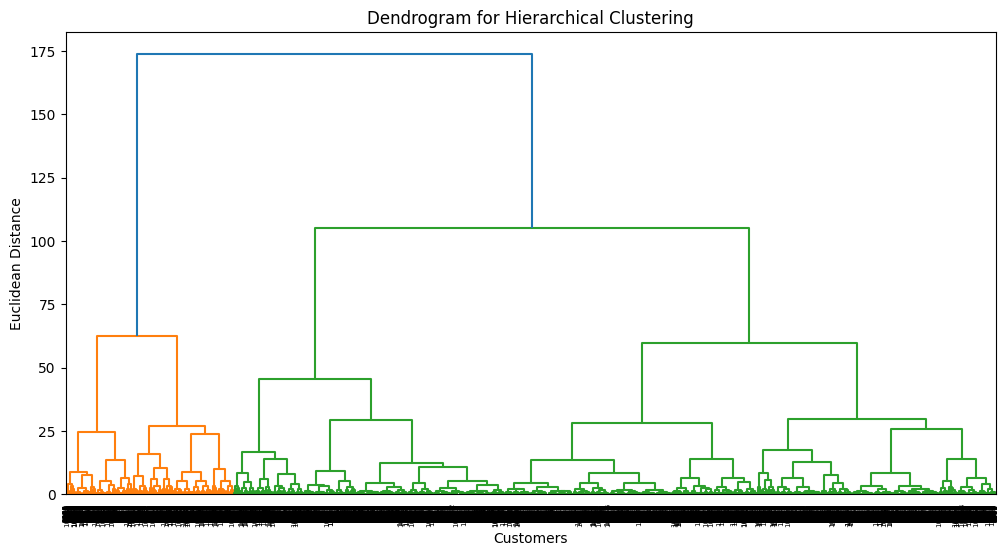

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hc.fit_predict(scaled_features)

In [ ]:
features['Cluster'] = clusters
features.head()

,Credit_Limit,Avg_Open_To_Buy,Customer_Age,Cluster
0,12691.0,11914.0,45.0,0
1,8256.0,7392.0,49.0,1
2,3418.0,3418.0,51.0,2
3,3313.0,796.0,40.0,1
4,4716.0,4716.0,40.0,1


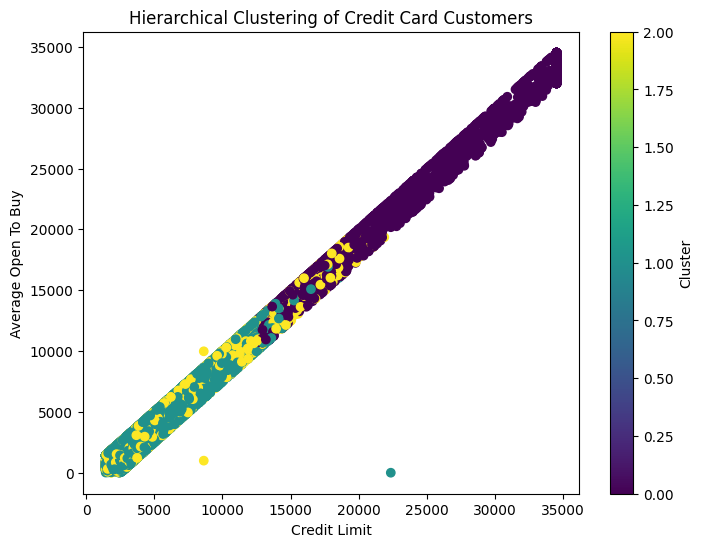

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(
    features['Credit_Limit'],
    features['Avg_Open_To_Buy'],
    c=features['Cluster'],
    cmap='viridis'
)

plt.xlabel("Credit Limit")
plt.ylabel("Average Open To Buy")
plt.title("Hierarchical Clustering of Credit Card Customers")
plt.colorbar(label='Cluster')
plt.show()
